In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# x = np.linspace(0, 1000, num=5000)
x = np.random.randn(100, 1) * 100
f = lambda x: x ** 2
y = f(x)

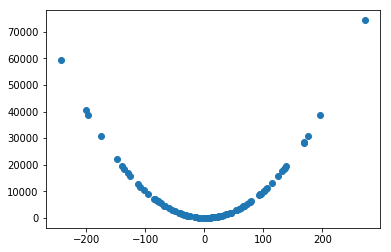

In [16]:
plt.scatter(x, y);

In [17]:
def random_initializer(n, m, seed=None):
    if seed is not None:
        np.random.seed(seed)
    return np.random.randn(n, m) * .01

def zero_initializer(n, m):
    return np.zeros((n, m))

In [18]:
class Linear:
    def __init__(self):
        self.last_input = None
    
    def forward(self, X):
        self.last_input = X
        return X
    
    def backward(self, dY):
        s = self.last_input
        return s * dY
    
    def __repr__(self):
        return 'linear'

class Sigmoid:
    def __init__(self):
        self.last_input = None
    
    def forward(self, X):
        self.last_input = X
        return self._sigmoid(X)
    
    def backward(self, dY):
        s = self._sigmoid(self.last_input)
        return s * (1 - s) * dY
    
    def _sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def __repr__(self):
        return 'sigmoid'

In [19]:
class Layer:
    def __init__(self, input_dim, output_dim, activation=None):
        """ Linear -> Activation dense layer """
        self.input_dim, self.output_dim = input_dim, output_dim
        self.activation = activation
        self.last_input = None
        
        self.W = random_initializer(output_dim, input_dim)
        self.b = zero_initializer(output_dim, 1)
    
    def forward_propagate(self, X):
        self.last_input = X  # Cache last input
#         print(f"W.shape={self.W.shape} | X.shape={X.shape}")
        Z = self.W @ X + self.b
        if self.activation:
            return self.activation.forward(Z)
        else:
            return Z

    def backward_propagate(self, dA):
        
        if self.activation:
            dZ = self.activation.backward(dA)
        else:
            dZ = dA
#         print(f"last_input_shape={self.last_input.shape}, dZ.shape={dZ.shape}")
        dW = dZ @ self.last_input.T / len(dZ)
        db = np.sum(dZ, axis=1, keepdims=True) / len(dZ)
#         print(f"dZ.shape={dZ.shape}, W.shape={self.W.shape}")
        dA = self.W.T @ dZ
        return dA, dW, db
    
    def __repr__(self):
        return f"{self.activation} # params = {self._n_params()}"
    
    def _n_params(self):
        w = self.W.shape[0] * self.W.shape[1]
        b = self.b.shape[0]
        return w + b

In [20]:
class Optimizer:
    def __init__(self):
        """ Class responsible for training process """
        pass
    

class GradientDescent:
    def __init__(self, learning_rate=.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def update(self, theta, grad):
        return theta - self.learning_rate * grad

In [21]:
class MSE:
    def forward(self, Y, Y_pred):
        return np.sum(np.power(Y - Y_pred, 2))
    
    def backward(self, Y, Y_pred):
        return -2 * (Y - Y_pred) / Y.shape[1]

    def __repr__(self):
        return 'MSE'

In [22]:
class History:
    def __init__(self):
        self.h = []
    
    def add(self, log):
        self.h.append(log)

In [23]:
class NeuralNetwork:
    def __init__(self, n_iterations=100, learning_rate=0.01, loss=MSE(), verbose=True):
        """ Class containing Neural Network architecture: Layers and Optimizer """
        self.layers = []
        # Optimizer stuff
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.loss = loss
        self.verbose = verbose
    
    def fit(self, X, Y):
        for i in range(self.n_iterations):
            y_pred = self.forward_(X)
            cost = self.loss.forward(Y, y_pred)
            if (self.verbose and i % 1 == 0):
                print(f"{i}: {self.loss}={cost}")
            self.backward_(Y, y_pred)
    
    def forward_(self, X):
        for l in self.layers:
            X = l.forward_propagate(X)
        return X
    
    def backward_(self, Y, Y_pred):
        dA = self.loss.backward(Y, Y_pred)
        for i, l in enumerate(reversed(self.layers)):
#             print(f"dA{i}={dA}")
            dA, dW, db = l.backward_propagate(dA)
#             print(f"dW{i}={dW}, W{i}={l.W}")
            l.W -= self.learning_rate * dW
#             print(f"W.shape={l.W.shape} | dW.shape={dW.shape}")
            l.b -= self.learning_rate * db
    
    def predict(self, X):
        pass
    
    def add(self, layer):
        self.layers.append(layer)
    
    def summary(self):
        return '\n'.join([repr(l) for l in self.layers])

In [24]:
model = NeuralNetwork(n_iterations=100, learning_rate=0.01, verbose=True)
model.add(Layer(1, 2, activation=Sigmoid()))
model.add(Layer(2, 2, activation=Sigmoid()))
model.add(Layer(2, 1, activation=None))

In [25]:
if len(x.shape) < 2:
    x = x[:, np.newaxis]
if len(y.shape) < 2:
    y = y[:, np.newaxis]

In [26]:
x_ok = (x - x.mean()) / x.std()

In [27]:
model.fit(x_ok.T, y.T)

0: MSE=22652470861.607815
1: MSE=22228249841.753273
2: MSE=21573026149.707855
3: MSE=20881930244.2547
4: MSE=20271277902.196285
5: MSE=19731705492.75347
6: MSE=19254939311.769806
7: MSE=18833668714.25263
8: MSE=18461434014.28646
9: MSE=18132527433.396355
10: MSE=17841905578.52185
11: MSE=17585112107.554737
12: MSE=17358209396.608208
13: MSE=17157718161.215845
14: MSE=16980564105.623154
15: MSE=16824030782.101454
16: MSE=16685717937.437677
17: MSE=16563504707.89277
18: MSE=16455517098.266884
19: MSE=16360099246.401451
20: MSE=16275788032.49316
21: MSE=16201290643.88379
22: MSE=16135464751.308554
23: MSE=16077300992.62907
24: MSE=16025907495.459883
25: MSE=15980496201.361189
26: MSE=15940370781.89558
27: MSE=15904915961.255768
28: MSE=15873588081.738432
29: MSE=15845906767.396914
30: MSE=15821447558.044746
31: MSE=15799835400.661173
32: MSE=15780738898.397047
33: MSE=15763865228.996466
34: MSE=15748955654.714115
35: MSE=15735781554.878223
36: MSE=15724140920.263231
37: MSE=15713855255.51